# Packages

In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import time
import operator

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 6

## Current Data
Use API to download data: 
The details of the loans currently listed on the Lending Club platform

In [5]:
api_key = open('apikey.txt', "r").read()

headers = {'Authorization':api_key, 'X-LC-LISTING-VERSION': '1.1' }
url = 'https://api.lendingclub.com/api/investor/v1/loans/listing'

r = requests.get(url, headers = headers)


api_data = r.json()
myData = api_data['loans']

The dictionary of the column names can be found here: https://www.lendingclub.com/developers/listed-loans.action

In [6]:
# df_current3 = pd.io.json.json_normalize(myData)
# df_current3.head()

In [7]:
# df_current3.shape 

In [8]:
# today = time.strftime("%d_%m_%Y")
# df_current3.to_csv('./'+today +"current_data.csv")

In [9]:
# df_current3.shape

Since sometimes the data is too small, we will use the data on July 13 as the current data.

In [10]:
path = '/Users/XiaofeiZheng/Documents/数据应用学院/Fin_tech/data/'
df_current = pd.read_csv(path + '13_07_2017current_data.csv')

In [11]:
df_current.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
df_current.head()

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,bcOpenToBuy,bcUtil,chargeoffWithin12Mths,collections12MthsExMed,creditPullD,delinq2Yrs,delinqAmnt,desc,dti,dtiJoint,earliestCrLine,empLength,empTitle,expD,expDefaultRate,ficoRangeHigh,ficoRangeLow,fundedAmount,grade,homeOwnership,housingPayment,iLUtil,id,ilsExpD,initialListStatus,inqFi,inqLast12m,inqLast6Mths,installment,intRate,investorCount,isIncV,isIncVJoint,listD,loanAmount,maxBalBc,memberId,moSinOldIlAcct,moSinOldRevTlOp,moSinRcntRevTlOp,moSinRcntTl,mortAcc,mtgPayment,mthsSinceLastDelinq,mthsSinceLastMajorDerog,mthsSinceLastRecord,mthsSinceRcntIl,mthsSinceRecentBc,mthsSinceRecentBcDlq,mthsSinceRecentInq,mthsSinceRecentRevolDelinq,numAcctsEver120Ppd,numActvBcTl,numActvRevTl,numBcSats,numBcTl,numIlTl,numOpRevTl,numRevAccts,numRevTlBalGt0,numSats,numTl120dpd2m,numTl30dpd,numTl90gDpd24m,numTlOpPast12m,openAcc,openAcc6m,openIl12m,openIl24m,openIl6m,openRv12m,openRv24m,pctTlNvrDlq,percentBcGt75,pubRec,pubRecBankruptcies,purpose,reviewStatus,reviewStatusD,revolBal,revolUtil,serviceFeeRate,subGrade,taxLiens,term,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
0,0,2,2017-07-05T14:22:21.000-07:00,CA,927xx,41.1,48000.0,NaN,INDIVIDUAL,2001,893.0,78.2,0,0,2017-07-04T12:43:19.000-07:00,0,0.0,NaN,7.20,NaN,1998-04-03T16:00:00.000-08:00,36.0,CSR Both jobs,2017-08-12T18:00:00.000-07:00,6.59,679,675,1625.0,C,RENT,850.0,NaN,112748526,2017-07-13T18:00:00.000-07:00,F,0,2,0,81.55,13.59,NaN,SOURCE_VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,2400.0,3207.0,121391634,26.0,231,7,7,0,0.0,NaN,NaN,83.0,26.0,34.0,NaN,8.0,NaN,0,1,3,1,2,1,3,5,3,3,0.0,0,0,2,3,0,0,0,0,2,2,100,100.0,1,1,other,APPROVED,2017-07-13T14:48:05.000-07:00,6002.0,41.1,1.05,C2,0,36,0,6002,14600,6,6002,0.0,4100,0,0,14600
1,0,4,2017-06-28T17:49:58.000-07:00,PA,191xx,77.9,48000.0,NaN,INDIVIDUAL,18453,1170.0,84.8,0,0,2017-06-28T17:31:54.000-07:00,1,0.0,NaN,28.63,NaN,2004-11-28T16:00:00.000-08:00,60.0,Legal Assistant,2017-08-12T17:56:17.000-07:00,3.99,669,665,850.0,B,MORTGAGE,1212.0,77.6,112145830,2017-07-13T18:00:00.000-07:00,F,0,6,0,274.65,10.91,NaN,VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,8400.0,2385.0,120748763,151.0,124,8,8,3,1212.0,5.0,NaN,89.0,11.0,19.0,NaN,11.0,NaN,0,4,5,4,5,8,5,7,5,9,0.0,0,0,2,9,0,1,2,2,1,2,94,75.0,1,1,credit_card,APPROVED,2017-07-13T16:06:19.000-07:00,6803.0,80.0,0.93,B4,0,36,0,166075,226920,18,46685,39882.0,7700,0,51420,8500
2,0,3,2017-07-01T13:50:39.000-07:00,TX,786xx,36.8,75000.0,NaN,INDIVIDUAL,3487,26102.0,17.1,0,0,2017-07-01T13:50:01.000-07:00,1,0.0,NaN,21.22,NaN,2000-03-31T16:00:00.000-08:00,72.0,Assistant manager,2017-08-12T18:00:00.000-07:00,3.99,669,665,675.0,B,RENT,900.0,56.6,112712495,2017-07-13T18:00:00.000-07:00,F,1,1,0,161.18,9.93,NaN,SOURCE_VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,5000.0,3079.0,121341638,96.0,207,31,11,0,0.0,14.0,72.0,NaN,11.0,38.0,25.0,11.0,14.0,2,3,3,3,6,5,4,7,3,7,0.0,0,0,1,7,0,1,3,3,0,0,58,33.3,0,0,debt_consolidation,APPROVED,2017-07-13T14:50:13.000-07:00,5398.0,16.5,0.93,B2,0,36,632,24406,66381,12,24406,19008.0,31500,0,33581,32800
3,0,3,2017-06-28T11:11:35.000-07:00,VT,054xx,79.7,50000.0,NaN,INDIVIDUAL,1196,912.0,79.7,0,0,2017-06-24T10:43:36.000-07:00,0,0.0,NaN,2.64,NaN,2006-04-23T17:00:00.000-07:00,0.0,finisher,2017-08-12T11:16:28.000-07:00,6.59,679,675,550.0,C,RENT,1000.0,NaN,111946542,2017-07-13T18:00:00.000-07:00,F,0,1,0,339.79,13.59,NaN,VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,10000.0,1836.0,120495257,134.0,122,11,11,0,0.0,NaN,NaN,NaN,42.0,11.0,NaN,11.0,NaN,0,3,3,3,3,5,3,4,3,3,0.0,0,0,1,3,0,0,0,0,1,3,100,66.7,0,0,other,APPROVED,2017-07-13T14:24:56.000-07:00,3588.0,79.7,1.05,C2,0,36,0,3588,4500,9,3588,0.0,4500,0,0,4500
4,0,8,2017-07-08T15:17:07.000-07:00,ND,585xx,54.1,42000.0,NaN,INDIVIDUAL,3520,8193.0,46.8,0,0,2017-07-08T14:37:33.000-07:00,5,0.0,NaN,31.46,NaN,1996-09-07T17:00:00.000-07:00,24.0,RN,2017-08-12T18:00:00.000-07:

In [13]:
df_current.tail()

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,bcOpenToBuy,bcUtil,chargeoffWithin12Mths,collections12MthsExMed,creditPullD,delinq2Yrs,delinqAmnt,desc,dti,dtiJoint,earliestCrLine,empLength,empTitle,expD,expDefaultRate,ficoRangeHigh,ficoRangeLow,fundedAmount,grade,homeOwnership,housingPayment,iLUtil,id,ilsExpD,initialListStatus,inqFi,inqLast12m,inqLast6Mths,installment,intRate,investorCount,isIncV,isIncVJoint,listD,loanAmount,maxBalBc,memberId,moSinOldIlAcct,moSinOldRevTlOp,moSinRcntRevTlOp,moSinRcntTl,mortAcc,mtgPayment,mthsSinceLastDelinq,mthsSinceLastMajorDerog,mthsSinceLastRecord,mthsSinceRcntIl,mthsSinceRecentBc,mthsSinceRecentBcDlq,mthsSinceRecentInq,mthsSinceRecentRevolDelinq,numAcctsEver120Ppd,numActvBcTl,numActvRevTl,numBcSats,numBcTl,numIlTl,numOpRevTl,numRevAccts,numRevTlBalGt0,numSats,numTl120dpd2m,numTl30dpd,numTl90gDpd24m,numTlOpPast12m,openAcc,openAcc6m,openIl12m,openIl24m,openIl6m,openRv12m,openRv24m,pctTlNvrDlq,percentBcGt75,pubRec,pubRecBankruptcies,purpose,reviewStatus,reviewStatusD,revolBal,revolUtil,serviceFeeRate,subGrade,taxLiens,term,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
151,0,2,2017-07-11T18:35:08.000-07:00,HI,967xx,85.3,90000.0,NaN,INDIVIDUAL,10504,10194.0,84.7,0,0,2017-07-11T18:31:29.000-07:00,0,0.0,NaN,25.00,NaN,1994-10-11T17:00:00.000-07:00,120.0,Office Manager/HR,2017-08-12T18:00:00.000-07:00,2.06,689,685,1000.0,A,RENT,425.0,88.3,112666228,2017-07-13T18:00:00.000-07:00,F,1,3,0,1002.33,7.97,NaN,SOURCE_VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,32000.0,17777.0,121293944,160.0,273,3,3,0,0.00,NaN,NaN,NaN,10.0,3.0,NaN,9.0,NaN,0,6,7,6,12,3,7,16,7,8,0.0,0,0,2,8,1,1,1,1,1,1,100,66.7,0,0,debt_consolidation,APPROVED,2017-07-13T16:48:44.000-07:00,56765.0,84.0,0.81,A5,0,36,0,84028,98471,19,84028,27263.0,66800,0,30871,67600
152,0,6,2017-07-11T14:18:10.000-07:00,IL,601xx,32.9,165000.0,NaN,INDIVIDUAL,47091,68418.0,36.8,0,0,2017-07-11T14:13:53.000-07:00,0,0.0,NaN,7.54,NaN,2000-12-10T16:00:00.000-08:00,120.0,Sales,2017-08-12T18:00:00.000-07:00,2.06,754,750,2425.0,A,MORTGAGE,1702.0,54.9,112875209,2017-07-13T18:00:00.000-07:00,F,3,2,1,1081.82,7.07,NaN,SOURCE_VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,35000.0,12750.0,121521925,159.0,199,15,9,3,3968.25,NaN,NaN,NaN,23.0,15.0,NaN,0.0,NaN,1,4,5,8,19,9,11,29,5,15,0.0,0,0,1,15,0,0,2,1,0,3,97,12.5,0,0,credit_card,APPROVED,2017-07-13T15:27:55.000-07:00,42198.0,29.6,0.81,A2,0,36,0,706366,902801,42,53997,11799.0,108200,4,21500,142700
153,0,2,2017-07-10T08:40:04.000-07:00,NY,100xx,38.5,190000.0,NaN,INDIVIDUAL,10140,67036.0,24.3,0,0,2017-07-10T08:33:58.000-07:00,0,0.0,NaN,10.00,NaN,1989-03-09T16:00:00.000-08:00,0.0,VP Communications,2017-08-12T18:00:00.000-07:00,2.06,764,760,2225.0,A,RENT,1700.0,75.2,112829620,2017-07-13T18:00:00.000-07:00,F,0,0,0,1048.00,5.32,NaN,SOURCE_VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,34800.0,7030.0,121476339,145.0,340,5,5,0,0.00,45.0,NaN,NaN,61.0,5.0,NaN,13.0,45.0,1,5,6,9,18,4,10,25,6,14,0.0,0,0,1,14,1,0,0,3,1,2,93,0.0,0,0,debt_consolidation,APPROVED,2017-07-13T14:15:36.000-07:00,21690.0,24.0,0.81,A1,0,36,0,121681,234623,30,121681,93508.0,88500,0,118957,90200
154,0,9,2017-07-13T15:01:33.000-07:00,TX,770xx,72.6,166000.0,NaN,INDIVIDUAL,15166,4215.0,82.1,0,0,2017-07-13T14:15:36.000-07:00,0,0.0,NaN,13.97,NaN,2001-08-12T17:00:00.000-07:00,120.0,International Program Specialist,2017-08-12T18:00:00.000-07:00,3.99,669,665,900.0,B,MORTGAGE,704.0,76.9,113102596,2017-07-13T18:00:00.000-07:00,F,3,1,1,1162.34,11.99,NaN,NOT_VERIFIED,NaN,2017-07-13T18:00:00.000-07:00,35000.0,14984.0,121782309,43.0,191,13,13,3,704.12,43.0,NaN,NaN,13.0,13.0,NaN,1.0,NaN,0,3,7,3,3,7,9,11,7,13,0.0,0,0,0,13,0,0,4,3,0,5,90,66.7,0,0,debt_consolidation,APPROVED,2017-07-13T15:16:12.000-07:00,41175.0,69.9,0.93,B5,0,36,0,197161,230353,21,69194,28019.0,23500,7,36453,58900
155,0,1,2017-07-11T20:04:58.000-07:00,CA,923xx,19.9,110000.0,NaN,I

In [14]:
print('df_current.shape: ', df_current.shape)

df_current.shape:  (156, 105)


In [15]:
cols_current = df_current.columns


Convert col names to lower case and without"-"

In [16]:
cols_current_new = [col.lower() for col in cols_current] 
df_current.columns = cols_current_new


## Loans in 2014

In [17]:
df_2014 = pd.read_csv(path +'LoanStats3c_2014.csv',skiprows = 1)
df_2014.shape

/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(235631, 128)

In [18]:
df_2014.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6%,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29%,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Jun-2017,689.0,685.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37822187,NaN,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,RENT,69000.0,Source Verified,Dec-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,077xx,NJ,25.81,0.0,Nov-1992,680.0,684.0,0.0,NaN,NaN,12.0,0.0,16388.0,59.4%,44.0,f,0.00,0.00,9973.43,9973.43,9600.00,373.43,0.0,0.00,0.0000,Apr-2015,9338.58,NaN,Feb-2017,674.0,670.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,38566.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
df_2014.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
235626,9604874,NaN,2000.0,2000.0,2000.0,36 months,7.90%,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-2003,715.0,719.0,1.0,13.0,NaN,21.0,0.0,11404.0,21.5%,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-2014,1500.68,NaN,Jun-2017,774.0,770.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,7.0,28172.0,36402.0,23.4,0.0,0.0,65.0,130.0,5.0,5.0,2.0,5.0,17.0,2.0,13.0,0.0,2.0,3.0,9.0,10.0,9.0,13.0,16.0,3.0,21.0,0.0,0.0,0.0,4.0,85.2,11.1,0.0,0.0,640841.0,50896.0,47500.0,37200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235627,9584776,NaN,20700.0,20700.0,20700.0,60 months,16.99%,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-2014,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-2001,715.0,719.0,2.0,65.0,NaN,18.0,0.0,6688.0,51.1%,43.0,f,8515.74,8515.74,21087.940023,21087.94,12184.26,8903.68,0.0,0.0,0.0,Jun-2017,514.34,Jul-2017,Jun-2017,689.0,685.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,8.0,4089.0,1822.0,78.6,0.0,0.0,144.0,93.0,80.0,19.0,3.0,93.0,NaN,1.0,NaN,0.0,1.0,2.0,1.0,1.0,38.0,2.0,2.0,2.0,18.0,0.0,0.0,0.0,0.0,97.6,100.0,0.0,0.0,96582.0,73598.0,8500.0,83482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235628,9199665,NaN,10000.0,10000.0,9975.0,36 months,19.20%,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-2000,680.0,684.0,0.0,9.0,NaN,6.0,0.0,11325.0,70.8%,22.0,f,0.00,0.00,13232.503339,13199.42,10000.00,3232.50,0.0,0.0,0.0,Jan-2017,367.20,NaN,Jan-2017,714.0,710.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.

In [20]:
cols_2014 = df_2014.columns

In [21]:
cols_2014_new = [col.replace('_', '') for col in cols_2014]
df_2014.columns = cols_2014_new

The last two observations are all NA, so we will throw them away.

In [22]:
df_2014 = df_2014[:-2]

In [23]:
print('df_2014.shape:', df_2014.shape)

df_2014.shape: (235629, 128)


## Features

## Find Common features

In [24]:
common_cols = list(set(df_2014.columns) & set(df_current.columns))
print('common_cols: ', len(common_cols))

common_cols:  87


In [25]:
common_cols.sort() # common_cols is updated.

In [26]:
unique_2014_cols = set(df_2014.columns).difference(set(common_cols))
print('len(unique_2014_cols):',len(unique_2014_cols))

unique_current_cols = set(df_current.columns).difference(set(common_cols))
print('len(unique_current_cols):', len(unique_current_cols))

len(unique_2014_cols): 41
len(unique_current_cols): 18


In [27]:
feature_dict={}
feature_dict['common_feature'] = common_cols
feature_dict['unique_2014'] = list(unique_2014_cols)
feature_dict['unique_current'] = list(unique_current_cols)

By looking up the dictionary, one can find that the features in name_to_update are actually the same as that in name_in_2014. So next we are going to using the name in 2014 dataset to uniform the names: updata the feature names in current dataset.

In [28]:
name_to_update = [ 'addrzip', 'isincv',  'isincvjoint',  'loanamount',  'numacctsever120ppd', 'fundedamount']
name_in_2014 = ['zipcode',  'verificationstatus', 'verificationstatusjoint', 'loanamnt', 'numacctsever120pd',  'fundedamnt']


rename_dict = dict(zip(name_to_update, name_in_2014))


In [29]:
df_current = df_current.rename(columns=rename_dict , inplace=False)


Include more features to common_cols after renaming the features in current dataset.

In [30]:
feature_dict['common_feature'] = feature_dict['common_feature'] + name_in_2014


In [31]:
print("After  updating, the number of common cols is  ", len(feature_dict['common_feature']))

After  updating, the number of common cols is   93


In [32]:
feature_dict['unique_2014'] = [x for x in feature_dict['unique_2014'] if x not in name_in_2014]

In [33]:
len(feature_dict['unique_2014'])

35

In [34]:
feature_dict['unique_current'] = [x for x in feature_dict['unique_current'] if x not in name_to_update]

In [35]:
len(feature_dict['unique_current'] )

12

Now there are 93 common features.

In [36]:
df_2014_1 = df_2014[feature_dict['common_feature']+['issued','loanstatus']]

In [37]:
df_2014_1.to_csv('loan_2014.csv')

In [38]:
df_2014_1.shape

(235629, 95)

In [42]:
df = pd.read_csv('loan_2014.csv')

/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
df.head()

,Unnamed: 0,accnowdelinq,accopenpast24mths,addrstate,allutil,annualinc,annualincjoint,applicationtype,avgcurbal,bcopentobuy,bcutil,chargeoffwithin12mths,collections12mthsexmed,delinq2yrs,delinqamnt,desc,dti,dtijoint,earliestcrline,emplength,emptitle,ficorangehigh,ficorangelow,grade,homeownership,id,ilutil,initialliststatus,inqfi,inqlast12m,inqlast6mths,installment,intrate,maxbalbc,memberid,mortacc,mosinoldilacct,mosinoldrevtlop,mosinrcntrevtlop,mosinrcnttl,mthssincelastdelinq,mthssincelastmajorderog,mthssincelastrecord,mthssincercntil,mthssincerecentbc,mthssincerecentbcdlq,mthssincerecentinq,mthssincerecentrevoldelinq,numactvbctl,numactvrevtl,numbcsats,numbctl,numiltl,numoprevtl,numrevaccts,numrevtlbalgt0,numsats,numtl120dpd2m,numtl30dpd,numtl90gdpd24m,numtloppast12m,openacc,openacc6m,openil12m,openil24m,openil6m,openrv12m,openrv24m,pcttlnvrdlq,percentbcgt75,pubrec,pubrecbankruptcies,purpose,revolbal,revolutil,subgrade,taxliens,term,totalacc,totalbalexmort,totalbalil,totalbclimit,totalcutl,totalilhighcreditlimit,totalrevhilim,totcollamt,totcurbal,tothicredlim,zipcode,verificationstatus,verificationstatusjoint,loanamnt,numacctsever120pd,fundedamnt,issued,loanstatus
0,0,0.0,7.0,CA,NaN,58000.0,NaN,INDIVIDUAL,9536.0,7599.0,41.5,0.0,0.0,0.0,0.0,NaN,14.92,NaN,Sep-1989,8 years,Truck Driver Delivery Personel,714.0,710.0,A,MORTGAGE,36805548,NaN,w,NaN,NaN,2.0,321.08,6.99%,NaN,NaN,1.0,76.0,290.0,1.0,1.0,42.0,59.0,NaN,NaN,5.0,42.0,1.0,42.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,83.3,14.3,0.0,0.0,credit_card,6133.0,31.6%,A3,0.0,36 months,36.0,15030.0,NaN,13000.0,NaN,11325.0,19400.0,0.0,162110.0,179407.0,937xx,Not Verified,NaN,10400.0,4.0,10400.0,Dec-2014,Charged Off
1,1,0.0,5.0,VA,NaN,78000.0,NaN,INDIVIDUAL,29828.0,9525.0,4.7,0.0,0.0,0.0,0.0,NaN,12.03,NaN,Aug-1994,10+ years,MANAGEMENT,754.0,750.0,C,RENT,38098114,NaN,w,NaN,NaN,0.0,336.64,12.39%,NaN,NaN,0.0,103.0,244.0,1.0,1.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,debt_consolidation,138008.0,29%,C1,0.0,60 months,17.0,149140.0,NaN,10000.0,NaN,12000.0,184500.0,0.0,149140.0,196500.0,235xx,Source Verified,NaN,15000.0,0.0,15000.0,Dec-2014,Fully Paid
2,2,0.0,8.0,NJ,NaN,69000.0,NaN,INDIVIDUAL,3214.0,6494.0,69.2,0.0,0.0,0.0,0.0,NaN,25.81,NaN,Nov-1992,10+ years,Admin Specialist,684.0,680.0,C,RENT,37822187,NaN,f,NaN,NaN,0.0,326.53,13.66%,NaN,NaN,0.0,183.0,265.0,23.0,3.0,NaN,NaN,NaN,NaN,24.0,NaN,17.0,NaN,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,60.0,0.0,0.0,debt_consolidation,16388.0,59.4%,C3,0.0,36 months,44.0,38566.0,NaN,21100.0,NaN,24890.0,27600.0,0.0,38566.0,52490.0,077xx,Source Verified,NaN,9600.0,0.0,9600.0,Dec-2014,Fully Paid
3,3,0.0,6.0,AZ,NaN,50000.0,NaN,INDIVIDUAL,5857.0,332.0,93.2,0.0,0.0,0.0,0.0,NaN,34.81,NaN,Aug-2002,< 1 year,Technical Specialist,689.0,685.0,C,RENT,37662224,NaN,f,NaN,NaN,1.0,260.20,13.66%,NaN,NaN,0.0,137.0,148.0,8.0,8.0,NaN,NaN,NaN,NaN,17.0,NaN,3.0,NaN,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,0.0,0.0,debt_consolidation,16822.0,91.9%,C3,0.0,36 months,20.0,64426.0,NaN,4900.0,NaN,64031.0,18300.0,0.0,64426.0,82331.0,850xx,Source Verified,NaN,7650.0,0.0,7650.0,Dec-2014,Charged Off
4,4,0.0,2.0,CA,NaN,125000.0,NaN,INDIVIDUAL,32727.0,0.0,103.2,0.0,0.0,1.0,0.0,NaN,8.31,NaN,Oct-2000,10+ years,Senior Sales Professional,669.0,665.0,D,MORTGAGE,37612354,NaN,w,NaN,NaN,0.0,319.08,17.14%,NaN,NaN,5.0,16.0,170.0,21.0,16.0,17.0,36.0,NaN,NaN,21.0,17.0,1.0,17.0,3.0,5.0,3.0,5.0,1.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,76.9,100.0,0.0,0.0,car,5753.0,100.9%,D4,0.0,60 months,13.0,18007.0,NaN,4400.0,NaN,18000.0,5700.0,0.0,261815.0,368700.0,953xx,Verified,NaN,12800.0,1.0,12800.0,Dec-2014,Current


In [44]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235629 entries, 0 to 235628
Data columns (total 95 columns):
accnowdelinq                  235629 non-null float64
accopenpast24mths             235629 non-null float64
addrstate                     235629 non-null object
allutil                       0 non-null float64
annualinc                     235629 non-null float64
annualincjoint                0 non-null float64
applicationtype               235629 non-null object
avgcurbal                     235623 non-null float64
bcopentobuy                   233184 non-null float64
bcutil                        233018 non-null float64
chargeoffwithin12mths         235629 non-null float64
collections12mthsexmed        235629 non-null float64
delinq2yrs                    235629 non-null float64
delinqamnt                    235629 non-null float64
desc                          15279 non-null object
dti                           235629 non-null float64
dtijoint                      0 non-nul

In [46]:
all_null_feature = []
num_feature = []
ob_feature = []
for col in df.columns:
    if df[col].isnull().sum()== df.shape[0]:
        all_null_feature.append(col)
    elif df[col].dtype == 'object':
        ob_feature.append(col)
    else:
        num_feature.append(col)
        

In [47]:
print(len(all_null_feature))
print(len(num_feature))
print(len(ob_feature))

18
59
18


In [48]:
all_null_feature

['allutil',
 'annualincjoint',
 'dtijoint',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'maxbalbc',
 'memberid',
 'mthssincercntil',
 'openacc6m',
 'openil12m',
 'openil24m',
 'openil6m',
 'openrv12m',
 'openrv24m',
 'totalbalil',
 'totalcutl',
 'verificationstatusjoint']

In [49]:
ob_feature

['addrstate',
 'applicationtype',
 'desc',
 'earliestcrline',
 'emplength',
 'emptitle',
 'grade',
 'homeownership',
 'initialliststatus',
 'intrate',
 'purpose',
 'revolutil',
 'subgrade',
 'term',
 'zipcode',
 'verificationstatus',
 'issued',
 'loanstatus']

## Cleaning data and Feature Engineering

### 'addrstate'
frequency -> as new feature

In [50]:
col = 'addrstate'
col_map = df[col].value_counts(normalize = True).to_dict()
name = col + "_freq"
df[name] = df[col].map(col_map)

num_feature.append(name)
ob_feature.remove(col)

In [62]:
len(df[col].unique())

49

### 'applicationtype'

drop b/c only one type

In [51]:
ob_feature.remove('applicationtype')

### 'desc'
drop or NLP

In [78]:
df['desc'].isnull().sum()/df.shape[0]

0.9351565384566416

In [75]:
len(df['desc'].unique())

14844

In [76]:
df.shape

(235629, 96)

In [52]:
df_current['desc'].isnull().sum() == df_current.shape[0]

True

In [53]:
ob_feature.remove('desc')

### 'earliestcrline'
convert to numerical data

In [54]:

dic_mon = {'Jan': 1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,'Oct': 10,"Nov":11,'Dec':12}

In [57]:
len(df['earliestcrline'].unique())

638

In [52]:
df['earliestcrline'].isnull().sum()

0

In [53]:
df['earliestcrline_month'] =df['earliestcrline'].apply(lambda x: 12 - dic_mon[x.split('-')[0]]+ 12*(2014 - int(x.split('-')[1])))

In [54]:
num_feature.append('earliestcrline_month')
ob_feature.remove('earliestcrline')

### 'emplength'

In [58]:
len(df['emplength'].unique())

12

In [59]:
df['emplength'].unique()

array(['8 years', '10+ years', '< 1 year', '6 years', '2 years', '7 years',
       '9 years', 'n/a', '3 years', '5 years', '4 years', '1 year'], dtype=object)

In [56]:
dic_length = {'< 1 year': 0, '1 year': 1, '2 year': 2, '3 year': 3, '4 year': 4, '5 year': 5, '6 year': 6, '7 year': 7, 
             '8 year': 8, '9 year': 9, '10+ year': 10, 'n/a': -9999}

In [57]:
df['emplength'] = df['emplength'].map(dic_length)

In [58]:
num_feature.append('emplength')
ob_feature.remove('emplength')

### 'emptitle' 
all to upper_case,then use frequence as the new feature.

In [79]:
len(df.emptitle.unique())

75353

In [80]:
df.emptitle =df.emptitle.str.upper().str.upper()

In [60]:
col = 'emptitle'
col_map = df[col].value_counts(normalize = True).to_dict()
name = col + "_freq"
df[name] = df[col].map(col_map)

num_feature.append(name)
ob_feature.remove(col)

### 'grade'
label encoding

In [64]:
df.grade.unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

### 'homeownership'
one hot encoding

In [65]:
df.homeownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

### 'initialliststatus'
one hot encoding

In [66]:
df['initialliststatus'].unique()

array(['w', 'f'], dtype=object)

### 'intrate'
convert to rate

In [61]:
col = 'intrate'
df.loc[:,col] =df.loc[:,col].apply(lambda x: float(str(x).strip('%'))/100)
df.loc[:,col]  = df.loc[:,col].astype('float')


In [62]:
ob_feature.remove('intrate')
num_feature.append('intrate')

### 'purpose'
one-hot encoding

In [68]:
len(df.purpose.unique())

13

### 'revolutil'

In [63]:
col = 'revolutil'
df.loc[:,col] =df.loc[:,col].apply(lambda x: float(str(x).strip('%'))/100)
df.loc[:,col]  = df.loc[:,col].astype('float')


In [64]:
ob_feature.remove('revolutil')
num_feature.append('revolutil')

### 'subgrade'
label encoding

In [71]:
len(df.subgrade.unique())

35

### 'term'
Gives the index

In [65]:
term_36_index = df.index[df['term']==df['term'].unique()[0]]


In [66]:
len(term_36_index)

162570

### 'zipcode'

In [67]:
col = 'zipcode'
col_map = df[col].value_counts(normalize = True).to_dict()
name = col + "_freq"
df[name] = df[col].map(col_map)

num_feature.append(name)
ob_feature.remove(col)

In [72]:
len(df.zipcode.unique())

866

### 'verificationstatus' 3 levels
one_hot encoding

###  'issued'


In [68]:
ob_feature.remove('issued')

In [69]:
issued_month = list(df['issued'].unique())

In [70]:
issued_month

['Dec-2014',
 'Nov-2014',
 'Oct-2014',
 'Sep-2014',
 'Aug-2014',
 'Jul-2014',
 'Jun-2014',
 'May-2014',
 'Apr-2014',
 'Mar-2014',
 'Feb-2014',
 'Jan-2014']

In [71]:
df['train_flag'] = df.issued.apply(lambda x: 0 if x in issued_month[0:3] else 1)

In [72]:
df['train_flag'].value_counts()

1    161485
0     74144
Name: train_flag, dtype: int64

In [73]:
'train_flag' in df.columns

True

### 'loanstatus'

In [74]:
loan_status_ind = [i for i in df.index  if df['loanstatus'][i] =='Fully Paid' 
       or df['loanstatus'][i] == 'Charged Off']


In [73]:
df.loanstatus.unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [75]:
len(loan_status_ind)

169475

In [76]:
index_final = list(set(loan_status_ind).intersection(set(term_36_index)))

In [77]:
ob_feature.remove('loanstatus')

In [78]:
target = df.loc[index_final,'loanstatus']


In [79]:
len(target)

129487

In [80]:
labels = target.map({'Fully Paid': 0,'Charged Off': 1})
labels.value_counts(normalize=True)

0    0.840069
1    0.159931
Name: loanstatus, dtype: float64

In [81]:
len(labels)

129487

In [ ]:
a+q

### Label Encoding and Hot Encoding

In [82]:
to_encoding_features = ['subgrade','grade']+['homeownership','verificationstatus','initialliststatus','purpose']

In [83]:
LBL = LabelEncoder()
LE_vars=[]
LE_map=dict()
for cat_var in to_encoding_features:
    print ("Label Encoding %s" % (cat_var))
    LE_var=cat_var+'_le'
    df[LE_var]=LBL.fit_transform(df[cat_var].astype(str).fillna('none'))
    LE_vars.append(LE_var)
    LE_map[cat_var]=LBL.classes_
    
print ("Label-encoded feaures: %s" % (LE_vars))

Label Encoding subgrade
Label Encoding grade
Label Encoding homeownership
Label Encoding verificationstatus
Label Encoding initialliststatus
Label Encoding purpose
Label-encoded feaures: ['subgrade_le', 'grade_le', 'homeownership_le', 'verificationstatus_le', 'initialliststatus_le', 'purpose_le']


In [84]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=True)
start=time.time()
OHE.fit(df[LE_vars])
OHE_sparse=OHE.transform(df[LE_vars])
                                   
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))


OHE_vars = [var + '_' + str(level).replace(' ','_')\
                for var in to_encoding_features for level in LE_map[var] ]

print ("OHE_sparse size :" ,OHE_sparse.shape)
print ("One-hot encoded catgorical feature samples : %s" % (OHE_vars[:100]))

One-hot-encoding finished in 0.672011 seconds
OHE_sparse size : (235629, 64)
One-hot encoded catgorical feature samples : ['subgrade_A1', 'subgrade_A2', 'subgrade_A3', 'subgrade_A4', 'subgrade_A5', 'subgrade_B1', 'subgrade_B2', 'subgrade_B3', 'subgrade_B4', 'subgrade_B5', 'subgrade_C1', 'subgrade_C2', 'subgrade_C3', 'subgrade_C4', 'subgrade_C5', 'subgrade_D1', 'subgrade_D2', 'subgrade_D3', 'subgrade_D4', 'subgrade_D5', 'subgrade_E1', 'subgrade_E2', 'subgrade_E3', 'subgrade_E4', 'subgrade_E5', 'subgrade_F1', 'subgrade_F2', 'subgrade_F3', 'subgrade_F4', 'subgrade_F5', 'subgrade_G1', 'subgrade_G2', 'subgrade_G3', 'subgrade_G4', 'subgrade_G5', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'homeownership_ANY', 'homeownership_MORTGAGE', 'homeownership_OWN', 'homeownership_RENT', 'verificationstatus_Not_Verified', 'verificationstatus_Source_Verified', 'verificationstatus_Verified', 'initialliststatus_f', 'initialliststatus_w', 'purpose_car', 'purpose_credit_card

In [85]:
OHE_data = pd.DataFrame(OHE_sparse.toarray(),columns = OHE_vars)

In [86]:
df1 = pd.concat([df, OHE_data], axis=1)

In [87]:
df1.head()

,accnowdelinq,accopenpast24mths,addrstate,allutil,annualinc,annualincjoint,applicationtype,avgcurbal,bcopentobuy,bcutil,chargeoffwithin12mths,collections12mthsexmed,delinq2yrs,delinqamnt,desc,dti,dtijoint,earliestcrline,emplength,emptitle,ficorangehigh,ficorangelow,grade,homeownership,id,ilutil,initialliststatus,inqfi,inqlast12m,inqlast6mths,installment,intrate,maxbalbc,memberid,mortacc,mosinoldilacct,mosinoldrevtlop,mosinrcntrevtlop,mosinrcnttl,mthssincelastdelinq,mthssincelastmajorderog,mthssincelastrecord,mthssincercntil,mthssincerecentbc,mthssincerecentbcdlq,mthssincerecentinq,mthssincerecentrevoldelinq,numactvbctl,numactvrevtl,numbcsats,numbctl,numiltl,numoprevtl,numrevaccts,numrevtlbalgt0,numsats,numtl120dpd2m,numtl30dpd,numtl90gdpd24m,numtloppast12m,openacc,openacc6m,openil12m,openil24m,openil6m,openrv12m,openrv24m,pcttlnvrdlq,percentbcgt75,pubrec,pubrecbankruptcies,purpose,revolbal,revolutil,subgrade,taxliens,term,totalacc,totalbalexmort,totalbalil,totalbclimit,totalcutl,totalilhighcreditlimit,totalrevhilim,totcollamt,totcurbal,tothicredlim,zipcode,verificationstatus,verificationstatusjoint,loanamnt,numacctsever120pd,fundedamnt,issued,loanstatus,addrstate_freq,earliestcrline_month,emptitle_freq,zipcode_freq,train_flag,subgrade_le,grade_le,homeownership_le,verificationstatus_le,initialliststatus_le,purpose_le,subgrade_A1,subgrade_A2,subgrade_A3,subgrade_A4,subgrade_A5,subgrade_B1,subgrade_B2,subgrade_B3,subgrade_B4,subgrade_B5,subgrade_C1,subgrade_C2,subgrade_C3,subgrade_C4,subgrade_C5,subgrade_D1,subgrade_D2,subgrade_D3,subgrade_D4,subgrade_D5,subgrade_E1,subgrade_E2,subgrade_E3,subgrade_E4,subgrade_E5,subgrade_F1,subgrade_F2,subgrade_F3,subgrade_F4,subgrade_F5,subgrade_G1,subgrade_G2,subgrade_G3,subgrade_G4,subgrade_G5,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,homeownership_ANY,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verificationstatus_Not_Verified,verificationstatus_Source_Verified,verificationstatus_Verified,initialliststatus_f,initialliststatus_w,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,7.0,CA,NaN,58000.0,NaN,INDIVIDUAL,9536.0,7599.0,41.5,0.0,0.0,0.0,0.0,NaN,14.92,NaN,Sep-1989,NaN,TRUCK DRIVER DELIVERY PERSONEL,714.0,710.0,A,MORTGAGE,36805548,NaN,w,NaN,NaN,2.0,321.08,0.0699,NaN,NaN,1.0,76.0,290.0,1.0,1.0,42.0,59.0,NaN,NaN,5.0,42.0,1.0,42.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,83.3,14.3,0.0,0.0,credit_card,6133.0,0.316,A3,0.0,36 months,36.0,15030.0,NaN,13000.0,NaN,11325.0,19400.0,0.0,162110.0,179407.0,937xx,Not Verified,NaN,10400.0,4.0,10400.0,Dec-2014,Charged Off,0.141273,303,0.000004,0.001426,0,2,0,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,VA,NaN,78000.0,NaN,INDIVIDUAL,29828.0,9525.0,4.7,0.0,0.0,0.0,0.0,NaN,12.03,NaN,Aug-1994,NaN,MANAGEMENT,754.0,750.0,C,RENT,38098114,NaN,w,NaN,NaN,0.0,336.64,0.1239,NaN,NaN,0.0,103.0,244.0,1.0,1.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,debt_consolidation,138008.0,0.290,C1,0.0,60 months,17.0,149140.0,NaN,10000.0,NaN,12000.0,184500.0,0.0,149140.0,196500.0,235xx,Source Verified,NaN,15000.0,0.0,15000.0,Dec-2014,Fully Paid,0.029559,244,0.001007,0.000628,0,10,2,3,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,8.0,NJ,NaN,69000.0,NaN,INDIVIDUAL,3214.0,6494.0,69.2,0.

In [88]:
df1.shape

(235629, 170)

In [89]:
ob_feature = [x for x in ob_feature if x not in to_encoding_features]

In [90]:
ob_feature

['term']

### Numerial Features

In [85]:
len(num_feature)

60

In [92]:
num_feature.remove('id')

In [93]:
id_feature = ['id']

In [94]:
num_feature.remove('fundedamnt')

In [95]:
len(num_feature)

64

### Missing values

In [81]:
def missing_value(X):
    missing_df = X.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.ix[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(10,8))
    rects = ax.barh(ind, missing_df.missing_count.values, color='salmon')
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values", fontsize = 14)
    ax.set_title("Number of missing values in each column")
    plt.show()
    return missing_df

In [84]:
df['mthssincelastrecord'].isnull().sum() == df.shape[0]

False

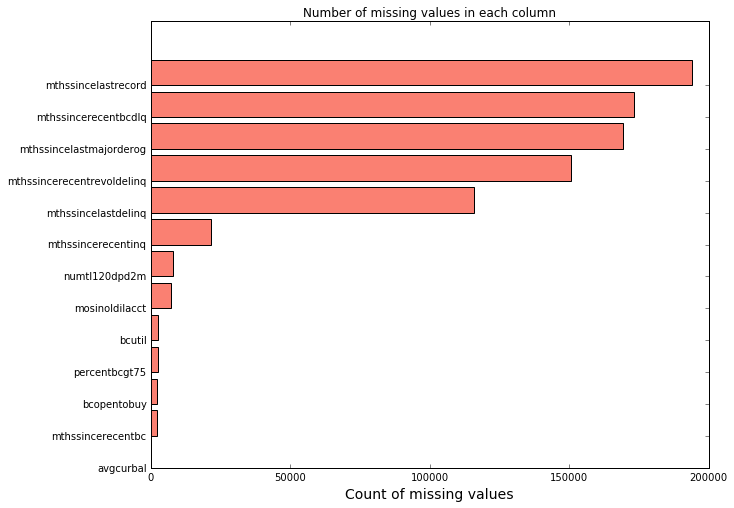

In [82]:
missing_num = missing_value(df[num_feature])

## EDA

## Training and testing dataset

In [96]:
"train_flag" in df1.columns

True

In [97]:
train = df1.iloc[index_final,:].query('train_flag == 1')

train.shape

(98997, 170)

In [98]:
test = df1.iloc[index_final,:].query('train_flag == 0')

test.shape

(30490, 170)

In [99]:
full_vars = num_feature + OHE_vars # features will be used to train the xgboost model
len(full_vars)

128

## Labels

In [100]:
trainY = labels[df1.train_flag == 1]
len(trainY)

98997

In [101]:
testY = labels[df1.train_flag == 0]
len(testY)

30490

# Build Models


### XGBOOST

In [102]:
import xgboost as xgb

In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve

In [181]:
xgtrain = xgb.DMatrix(train[full_vars], 
                         trainY)
xgtest = xgb.DMatrix(test[full_vars])

### tune max_depth

In [127]:
start = time.time()
xgb_scores = pd.DataFrame()
scores = []

for max_depth in [3,4,5,6,7,8,9,10]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = max_depth
    params['min_child_weight'] = 1
    params['subsample'] = 1
    params['colsample_bytree'] = 1
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'auc'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-auc-mean'].min()
    print (max_depth,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])

end = time.time()
print('training time is :', end - start)

xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_max_depth = int(pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).sort_values(by='score',ascending=True)['max_depth'].values[0])
print ('best max_depth is', best_max_depth)

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.655668+0.00147503	test-auc:0.651846+0.00465851
[50]	train-auc:0.697326+0.000976472	test-auc:0.683989+0.0037945
[100]	train-auc:0.712266+0.000798792	test-auc:0.689949+0.00302765
[150]	train-auc:0.721889+0.000820214	test-auc:0.691758+0.00262024
[200]	train-auc:0.730251+0.000879742	test-auc:0.692845+0.00241241
[250]	train-auc:0.737742+0.000874676	test-auc:0.69358+0.00237778
[300]	train-auc:0.744078+0.000847225	test-auc:0.693894+0.00231764
[350]	train-auc:0.750183+0.000990732	test-auc:0.693999+0.00240674
Stopping. Best iteration:
[338]	train-auc:0.748828+0.00101103	test-auc:0.694052+0.00241311

3 0.6518464 339
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.665046+0.0012895	test-auc:0.657744+0.0032869
[50]	train-auc:0.71311+0.00

In [254]:
best_max_depth =3

### Tune min child weight

In [130]:
start = time.time()
xgb_scores = pd.DataFrame()
scores = []

for min_child_weight in [1,3,10,30,50,75,100]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = min_child_weight
    params['subsample'] = 1
    params['colsample_bytree'] = 1
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'auc'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-auc-mean'].min()
    print (min_child_weight,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
end = time.time()
print('Training time is ', end - start)

xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_min_child_weight = int(pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).sort_values(by='score',ascending=True)['min_child_weight'].values[0])
print ('best min_child_weight is', best_min_child_weight)

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.655668+0.00147503	test-auc:0.651846+0.00465851
[50]	train-auc:0.697326+0.000976472	test-auc:0.683989+0.0037945
[100]	train-auc:0.712266+0.000798792	test-auc:0.689949+0.00302765
[150]	train-auc:0.721889+0.000820214	test-auc:0.691758+0.00262024
[200]	train-auc:0.730251+0.000879742	test-auc:0.692845+0.00241241
[250]	train-auc:0.737742+0.000874676	test-auc:0.69358+0.00237778
[300]	train-auc:0.744078+0.000847225	test-auc:0.693894+0.00231764
[350]	train-auc:0.750183+0.000990732	test-auc:0.693999+0.00240674
Stopping. Best iteration:
[338]	train-auc:0.748828+0.00101103	test-auc:0.694052+0.00241311

1 0.6518464 339
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.655668+0.00147503	test-auc:0.651846+0.00465851
[50]	train-auc:0.697297+0

In [253]:
best_min_child_weight =1

### Tune colsample_bytree

In [132]:
start = time.time()
xgb_scores = pd.DataFrame()
scores = []

for colsample_bytree in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = 1
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'auc'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-auc-mean'].min()
    print (colsample_bytree,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
end = time.time()
print('The training time is', end - start)
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_colsample_bytree = pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).\
                sort_values(by='score',ascending=True)['colsample_bytree'].values[0]
print ('best colsample_bytree is', best_colsample_bytree)

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.655337+0.00175835	test-auc:0.652366+0.00512745
[50]	train-auc:0.695119+0.00109401	test-auc:0.683253+0.00289428
[100]	train-auc:0.708854+0.000451809	test-auc:0.690041+0.00209242
[150]	train-auc:0.717407+0.000374475	test-auc:0.692024+0.00184107
[200]	train-auc:0.724543+0.000339787	test-auc:0.693199+0.00175353
[250]	train-auc:0.730824+0.000296506	test-auc:0.693669+0.00175174
[300]	train-auc:0.736525+0.000615225	test-auc:0.693956+0.00152601
[350]	train-auc:0.741889+0.000689772	test-auc:0.694205+0.00163564
[400]	train-auc:0.746821+0.000753729	test-auc:0.694396+0.0014293
Stopping. Best iteration:
[389]	train-auc:0.74584+0.000739123	test-auc:0.694425+0.00146772

0.2 0.6523662 390
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.6553

In [252]:
best_colsample_bytree=1

### Tune subsample

In [ ]:
start = time.time()
xgb_scores = pd.DataFrame()
scores = []

for subsample in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:

    params = dict()
    params['objective'] ='binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = best_colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'auc'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-auc-mean'].min()
    print (subsample,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
end = time.time()
print('The training time is',end - start)
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_subsample = pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).\
                sort_values(by='score',ascending=True)['subsample'].values[0]
print ('best subsample is', best_subsample)

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.646828+0.00281777	test-auc:0.642213+0.00484816
[50]	train-auc:0.696962+0.00137991	test-auc:0.684342+0.00236142
[100]	train-auc:0.709862+0.000529806	test-auc:0.68898+0.00211817
[150]	train-auc:0.718731+0.000387765	test-auc:0.690489+0.00132463
[200]	train-auc:0.725642+0.000679472	test-auc:0.690288+0.00134663
Stopping. Best iteration:
[161]	train-auc:0.720315+0.000555844	test-auc:0.690704+0.00157519

0.2 0.6422128 162
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.650615+0.00208672	test-auc:0.648357+0.00764521
[50]	train-auc:0.697455+0.000964328	test-auc:0.685457+0.00295403
[100]	train-auc:0.710865+0.000548328	test-auc:0.690046+0.00178521
[150]	train-auc:0.720796+0.000487224	test-auc:0.691126+0.00161352
[200]	train-auc:0.72896

In [251]:
best_subsample =0.2

### Tune gamma

In [109]:
start = time.time()
xgb_scores = pd.DataFrame()
scores = []

for gamma in [0,0.1,0.2,0.5,1,1.25,1.5,1.75,2]:

    params = dict()
    params['objective'] ='binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = best_colsample_bytree
    params['subsample'] = best_subsample
    params['gamma'] = gamma
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'auc'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-auc-mean'].min()
    print (gamma,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
end = time.time()
print('The training time is ', end - start)
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_gamma = pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).\
                    sort_values(by='score',ascending=True)['gamma'].values[0]
print ('best gamma is', best_subsample)

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.646828+0.00281777	test-auc:0.642213+0.00484816
[50]	train-auc:0.696962+0.00137991	test-auc:0.684342+0.00236142
[100]	train-auc:0.709862+0.000529806	test-auc:0.68898+0.00211817
[150]	train-auc:0.718731+0.000387765	test-auc:0.690489+0.00132463
[200]	train-auc:0.725642+0.000679472	test-auc:0.690288+0.00134663
Stopping. Best iteration:
[161]	train-auc:0.720315+0.000555844	test-auc:0.690704+0.00157519

0 0.6422128 162
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.646828+0.00281777	test-auc:0.642213+0.00484816
[50]	train-auc:0.696962+0.00137991	test-auc:0.684342+0.00236142
[100]	train-auc:0.709862+0.000529806	test-auc:0.68898+0.00211817
[150]	train-auc:0.718731+0.000387765	test-auc:0.690489+0.00132463
[200]	train-auc:0.725641+0.

In [250]:
best_gamma = 0.2

### Train a XGBoost model with manually tuned parameters

In [258]:
params = dict()
params['objective'] = 'binary:logistic'
params['eta'] = 0.1
params['max_depth'] = best_max_depth
params['min_child_weight'] = best_min_child_weight
params['colsample_bytree'] = best_colsample_bytree
params['subsample'] = best_subsample
params['gamma'] = best_gamma
params['seed']=1234



model_manual = xgb.train(params, xgtrain, num_boost_round=best_iteration)
pred = model_manual.predict(xgtest)



In [259]:
roc_auc_score(np.array(testY),pred)

0.69511735638067706

## plot roc curve

In [145]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl


In [198]:
def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test):
    probas_v = model.predict(dvalid, ntree_limit = model.best_ntree_limit)
    probas_tr = model.predict(dtrain, ntree_limit = model.best_ntree_limit)
    probas_ts = model.predict(dtest, ntree_limit = model.best_ntree_limit)
    
    fpr_v, tpr_v, thresholds_v = roc_curve(y_valid, probas_v)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, probas_tr)
    fpr_ts, tpr_ts, thresholds_ts = roc_curve(y_test, probas_ts)
    roc_auc_v = auc(fpr_v, tpr_v)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    print('Area under the ROC curve -validation: %f' % roc_auc_v)
    print('Area under the ROC curve -train: %f' % roc_auc_tr)
    print('Area under the ROC curve -test: %f' % roc_auc_ts)
    
    plt.figure(figsize = (10,10))
    plt.plot(fpr_v,tpr_v, label = 'ROC curve - validation(AUC = %0.2f)' % roc_auc_v, color = 'r')
    plt.plot(fpr_tr,tpr_tr, label = 'ROC curve - train(AUC = %0.2f)' % roc_auc_tr, color = 'b')
    plt.plot(fpr_ts,tpr_ts, label = 'ROC curve - test(AUC = %0.2f)' % roc_auc_ts, color = 'g')
    
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC for lead score model')
    plt.legend(loc = 'lower right')
    plt.show()
    
    

In [199]:
from sklearn.cross_validation import train_test_split

In [200]:
dtrain, dvalid ,y_train, y_valid = train_test_split(train[full_vars], trainY, test_size = 0.3) 

In [201]:
dtrain = xgb.DMatrix(dtrain)
#y_train = xgb.DMatrix(y_train.values)

dvalid = xgb.DMatrix(dvalid)
#y_valid = xgb.DMatrix(y_valid.values)
 

Area under the ROC curve -validation: 0.771665
Area under the ROC curve -train: 0.773269
Area under the ROC curve -test: 0.695117


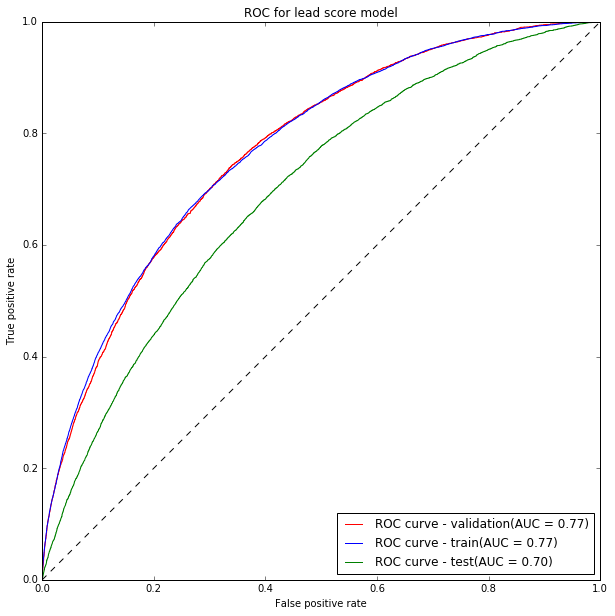

In [260]:
draw_ROC(model_manual, dtrain, dvalid, xgtest, y_train, y_valid, testY)

### Distribution of prediciton

In [261]:
print(min(pred),max(pred))

0.00136619 0.915855


The fully paid loans take 84%.

### Feature Importance

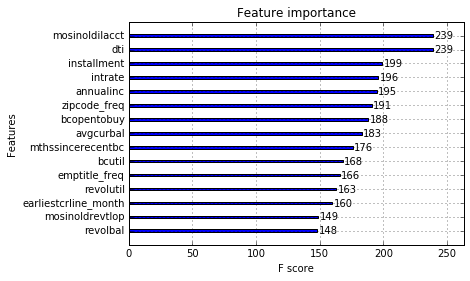

In [262]:

xgb.plot_importance(model_manual,max_num_features =15)

## Save model

In [263]:
today = time.strftime("%d_%m_%Y")

In [264]:
model_manual.save_model(today+'_xgboost_manual.model')

In [265]:
import pickle


In [266]:
with open(today+'model_manual.pkl','wb') as outfile:
    pickle.dump(model, outfile)

## Automated tuning

In [222]:
from bayes_opt import BayesianOptimization

In [224]:

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = int(max_depth )   
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = True    


    cv_result = xgb.cv(params, xgtrain,
                       num_boost_round=100000,
                       nfold=5,
                       metrics={'auc'},
                       seed=1234,
                       callbacks=[xgb.callback.early_stop(50)])

    return -cv_result['test-auc-mean'].min()

start = time.time()
xgb_BO = BayesianOptimization(xgb_evaluate, 
                             {'max_depth': (2, 5),
                              'min_child_weight': (0, 100),
                              'colsample_bytree': (0.1, 1),
                              'subsample': (0.1, 1),
                              'gamma': (0, 2)
                             }
                            )
end = time.time()
print('The training time is ', end - start)
xgb_BO.maximize(init_points=8, n_iter=40)

Initialization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[171]	train-auc:0.727028+0.000502597	test-auc:0.693722+0.00131619

    1 | 04m14s |   -0.65381 |             0.8846 |    0.4850 |      4.4025 |            95.6295 |      0.3279 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[606]	train-auc:0.731219+0.00038817	test-auc:0.695363+0.00218431

    2 | 04m56s |   -0.59100 |             0.5146 |    0.4896 |      2.1834 |             5.7232 |      0.7819 | 
Multiple eval metrics have been passed: 'test-auc' will be used for

/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'warnflag': 2, 'grad': array([  1.29702557e-05]), 'nit': 6}
  " state: %s" % convergence_dict)


   15 | 03m51s |   -0.64060 |             0.9016 |    0.1631 |      2.1051 |             0.0700 |      0.1938 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[150]	train-auc:0.708972+0.000693687	test-auc:0.68469+0.00195943

   16 | 01m20s |   -0.60920 |             0.1000 |    2.0000 |      5.0000 |             8.4999 |      0.1000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[275]	train-auc:0.699829+0.00125391	test-auc:0.689395+0.00172827

   17 | 01m38s |   -0.58963 |             0.1000 |    2.0000 |      2.0000 |            51.5214 |      0.1000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[878]	train-auc:0.729887+0.0

/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'warnflag': 2, 'grad': array([  1.77590246e-05]), 'nit': 4}
  " state: %s" % convergence_dict)


   21 | 03m01s |   -0.63329 |             1.0000 |    2.0000 |      2.0406 |            81.6668 |      0.1000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[872]	train-auc:0.727588+0.000423013	test-auc:0.695515+0.00219477

   22 | 03m19s |   -0.57220 |             0.1000 |    0.0000 |      2.0000 |           100.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[257]	train-auc:0.696673+0.00137137	test-auc:0.688341+0.00304013

   23 | 01m14s |   -0.58933 |             0.1000 |    2.0000 |      2.0000 |           100.0000 |      0.1000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[274]	train-auc:0.700589+0.

/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'warnflag': 2, 'grad': array([ -1.42940959e-05]), 'nit': 5}
  " state: %s" % convergence_dict)


   26 | 06m19s |   -0.64151 |             1.0000 |    2.0000 |      2.0000 |            41.8161 |      0.8128 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[332]	train-auc:0.757028+0.000442311	test-auc:0.694637+0.00259666

   27 | 02m03s |   -0.58075 |             0.1000 |    0.0000 |      4.7774 |            26.2291 |      1.0000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[242]	train-auc:0.729531+0.00102729	test-auc:0.692863+0.00251342



/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'warnflag': 2, 'grad': array([ -6.73239567e-05]), 'nit': 4}
  " state: %s" % convergence_dict)


   28 | 01m50s |   -0.61342 |             0.1331 |    0.0247 |      4.8940 |            48.3042 |      0.2914 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[193]	train-auc:0.712714+0.00118212	test-auc:0.689915+0.00228002



/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'warnflag': 2, 'grad': array([  1.40197953e-05]), 'nit': 5}
  " state: %s" % convergence_dict)


   29 | 01m22s |   -0.60782 |             0.1279 |    1.8058 |      4.9315 |            62.6536 |      0.1584 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[232]	train-auc:0.738655+0.00146664	test-auc:0.694875+0.00244482

   30 | 01m41s |   -0.61651 |             0.1317 |    0.0083 |      4.5742 |            72.3046 |      0.9578 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[728]	train-auc:0.725945+0.000301939	test-auc:0.695097+0.00221524



/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'warnflag': 2, 'grad': array([ -9.04876688e-05]), 'nit': 5}
  " state: %s" % convergence_dict)


   31 | 02m41s |   -0.57220 |             0.1000 |    0.0000 |      2.0000 |            30.3401 |      1.0000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[824]	train-auc:0.730619+0.000483081	test-auc:0.694943+0.0024235

   32 | 03m16s |   -0.59228 |             0.1010 |    1.4721 |      2.2971 |            13.2054 |      0.9854 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[408]	train-auc:0.70986+0.000438873	test-auc:0.691533+0.00120897

   33 | 01m55s |   -0.58945 |             0.1535 |    0.0924 |      2.0300 |            38.9090 |      0.1679 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[741]	train-auc:0.726919+0.0

/Users/XiaofeiZheng/anaconda/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'warnflag': 2, 'grad': array([ -1.25747174e-05]), 'nit': 5}
  " state: %s" % convergence_dict)


   35 | 01m33s |   -0.60889 |             0.1000 |    0.0000 |      5.0000 |           100.0000 |      0.1000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[857]	train-auc:0.728954+0.000879272	test-auc:0.695656+0.00261357

   36 | 03m24s |   -0.59228 |             0.1000 |    0.0000 |      2.0000 |            52.6180 |      0.8779 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[697]	train-auc:0.726786+0.000357421	test-auc:0.694679+0.00246579

   37 | 03m05s |   -0.57220 |             0.1000 |    0.0001 |      2.0003 |             2.5052 |      1.0000 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[604]	train-auc:0.725129+0

In [225]:
BO_scores = pd.DataFrame(xgb_BO.res['all']['params'])
BO_scores['score'] = pd.DataFrame(xgb_BO.res['all']['values'])
BO_scores = BO_scores.sort_values(by='score',ascending=False).reset_index()
BO_scores.head()

,index,colsample_bytree,gamma,max_depth,min_child_weight,subsample,score
0,37,0.125996,2.0,2.000000,35.279757,1.0,-0.562120
1,39,0.100000,0.0,2.000000,86.786570,1.0,-0.572197
2,10,0.100000,2.0,2.865857,0.470354,1.0,-0.572197
3,22,0.100000,0.0,2.000000,30.340075,1.0,-0.572197
4,13,0.100000,0.0,2.000000,100.000000,1.0,-0.572197


### Extract best parameters

In [267]:
best_params = dict()

best_params['max_depth'] = int(BO_scores['max_depth'][0])
best_params['min_child_weight'] = int(BO_scores['min_child_weight'][0])
best_params['colsample_bytree'] = BO_scores['colsample_bytree'][0]
best_params['subsample'] = BO_scores['subsample'][0]
best_params['gamma'] = BO_scores['gamma'][0]

best_params['objective'] = 'binary:logistic'
best_params['eta'] = 0.1
best_params['seed'] = 1234

print (best_params)

{'seed': 1234, 'subsample': 1.0, 'max_depth': 2, 'eta': 0.1, 'gamma': 2.0, 'min_child_weight': 35, 'objective': 'binary:logistic', 'colsample_bytree': 0.12599623829766929}


### Retain the model with the best auto tuning parameters

In [268]:
best_params = dict()

best_params['max_depth'] = int(BO_scores['max_depth'][0])
best_params['min_child_weight'] = int(BO_scores['min_child_weight'][0])
best_params['colsample_bytree'] = BO_scores['colsample_bytree'][0]
best_params['subsample'] = BO_scores['subsample'][0]
best_params['gamma'] = BO_scores['gamma'][0]

best_params['objective'] = 'binary:logistic'
best_params['eta'] = 0.1
best_params['seed'] = 1234


cv_result = xgb.cv(best_params, xgtrain,
                   num_boost_round=100000,
                   nfold=5,
                   metrics={'auc'},
                   seed=1234,
                   callbacks=[xgb.callback.early_stop(50)], 
                  verbose_eval=50)

best_iteration = len(cv_result)
best_score = cv_result['test-auc-mean'].min()
print("Best score %f, best iteration %d" % (best_score,best_iteration) )

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.642748+0.00153364	test-auc:0.641506+0.00544498
[50]	train-auc:0.683465+0.00117208	test-auc:0.67745+0.0044394
[100]	train-auc:0.694237+0.000645464	test-auc:0.685362+0.0037725
[150]	train-auc:0.700166+0.000686032	test-auc:0.689008+0.00310078
[200]	train-auc:0.704184+0.000669685	test-auc:0.690625+0.00280276
[250]	train-auc:0.707257+0.000521737	test-auc:0.691689+0.00260871
[300]	train-auc:0.709858+0.000472538	test-auc:0.692476+0.00256458
[350]	train-auc:0.712326+0.000575247	test-auc:0.692875+0.0022476
[400]	train-auc:0.714646+0.000604116	test-auc:0.693445+0.00222354
[450]	train-auc:0.716824+0.000637698	test-auc:0.693731+0.00216729
[500]	train-auc:0.718834+0.000705487	test-auc:0.694042+0.00217458
[550]	train-auc:0.720727+0.000647835	test-auc:0.694403+0.00212916
[600]	train-auc:0.722394+0.000589301	test-auc:0.694516+0.00210341
[650]	trai

In [269]:
model_bayes = xgb.train(best_params, xgtrain, num_boost_round=best_iteration)
pred = model.predict(xgtest)



In [234]:
roc_auc_score(np.array(testY), pred)

0.70789610092008548

Area under the ROC curve -validation: 0.721261
Area under the ROC curve -train: 0.726136
Area under the ROC curve -test: 0.707896


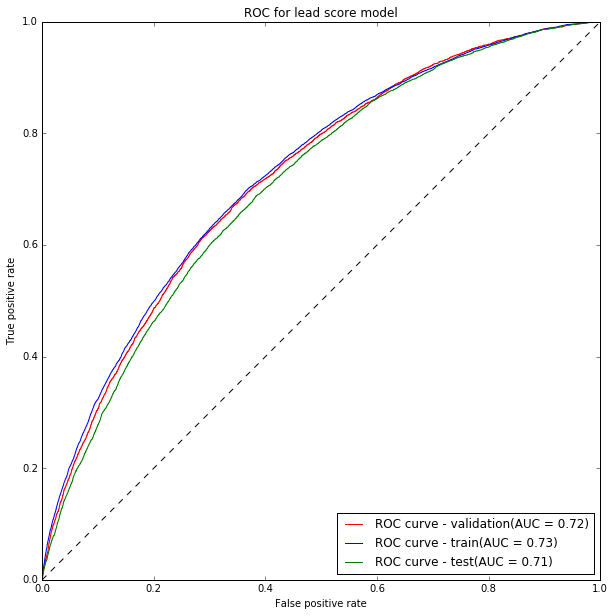

In [270]:
draw_ROC(model, dtrain, dvalid, xgtest, y_train, y_valid, testY)

In [271]:
print(min(pred),max(pred))

0.00632816 0.732899


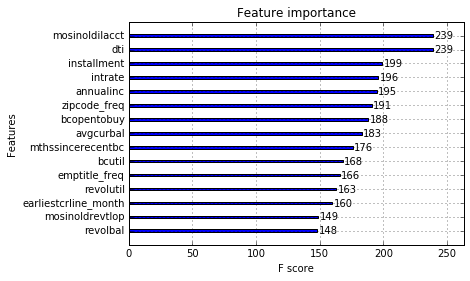

In [272]:

xgb.plot_importance(model_manual,max_num_features =15)

In [ ]:
df.mosinoldrevtlop

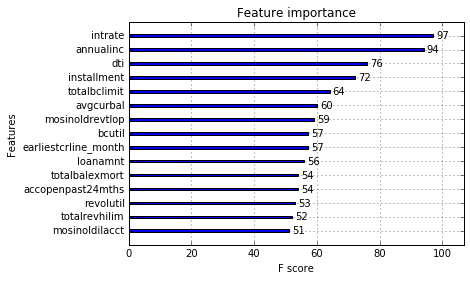

In [273]:

xgb.plot_importance(model_bayes,max_num_features =15)

In [274]:
today = time.strftime("%d_%m_%Y")

In [275]:
model_bayes.save_model(today+'_xgboost_bayes.model')

In [276]:
with open(today+'model_bayes.pkl','wb') as outfile:
    pickle.dump(model_bayes, outfile)

In [295]:
features = train.columns

In [297]:
with open(today+'features.pkl','wb') as outfile:
    pickle.dump(features, outfile)

In [299]:
with open('26_07_2017features.pkl','rb') as outfile:
    my_features = pickle.load(outfile)

In [294]:
with open('feature.pkl', 'rb') as AutoPickleFile:
     feature_default = pickle.load(AutoPickleFile)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xbf in position 6: ordinal not in range(128)

In [292]:
with open('model.pkl', 'rb') as AutoPickleFile:
     model_default = pickle.load(AutoPickleFile)

In [293]:
model_default.feature_names

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_s

In [284]:
'loanamnt'  in df.columns

True

In [285]:
'intrate' in df.columns

True

In [286]:
'fundrate' in df.columns

False

In [287]:
'bcopentobuy' in df.columns

True

In [288]:
'totalilhighcreditlimit' in df.columns

True

In [289]:
'bcutil' in df.columns

True

In [301]:
'annualinc' in df.columns

True